**Upload breast cancer wisconsin data set file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast cancer wisconsin data set.csv to Breast cancer wisconsin data set.csv


**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_score, recall_score
)
from scipy.special import expit

**Load dataset**

In [ ]:
try:
    df = pd.read_csv('Breast cancer wisconsin data set.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except Exception as e:
    print(f"Error loading file: {e}")
    raise

Dataset loaded successfully!
Shape: (569, 33)

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

 

**Preprocessing**

In [ ]:
print("\nNull values before dropping:")
print(df.isnull().sum())

# Drop any completely empty columns
df.dropna(axis=1, how='all', inplace=True)

# Check for nulls in rows
print("\nNull values after dropping empty columns:")
print(df.isnull().sum())

# Drop rows with any null values if they exist
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)
    print("\nDropped rows with null values")

# Verify we still have data
if len(df) == 0:
    raise ValueError("Dataset has no rows after preprocessing!")

# Convert diagnosis to binary: M = 1, B = 0
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
else:
    raise ValueError("'diagnosis' column not found in dataset")

# Split features and target
X = df.drop(['diagnosis'], axis=1)
X = X.select_dtypes(include=['number'])  # Keep only numeric columns
y = df['diagnosis']

print(f"\nFinal dataset shape: {X.shape}")


Null values before dropping:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_d

**Split and scale data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (455, 31)
Test shape: (114, 31)


**Fit logistic regression model**

In [ ]:
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

**Predictions and evaluation**

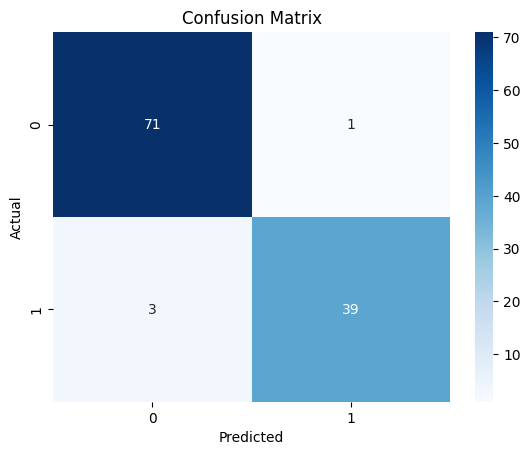

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Precision: 0.97
Recall: 0.93


In [ ]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

**ROC curve**

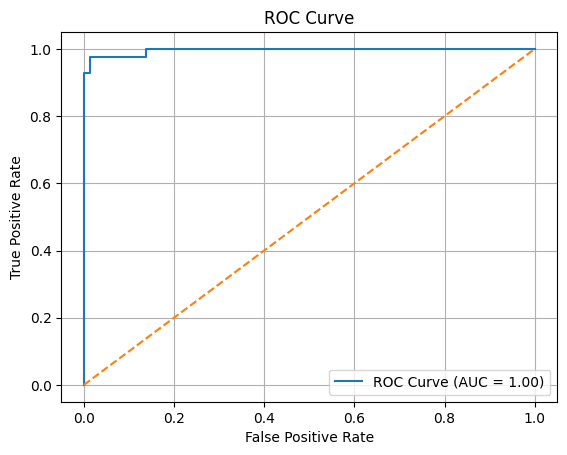

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

**Tune threshold**

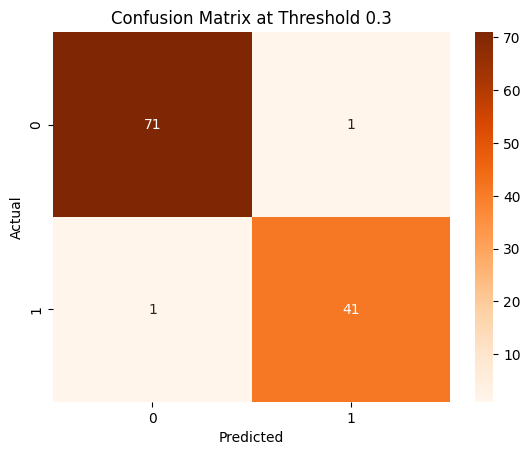

Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
threshold = 0.3     # different thresholds
y_custom = (y_prob >= threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_custom)
sns.heatmap(cm_custom, annot=True, fmt="d", cmap='Oranges')
plt.title(f"Confusion Matrix at Threshold {threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_custom))

**Explain sigmoid function**

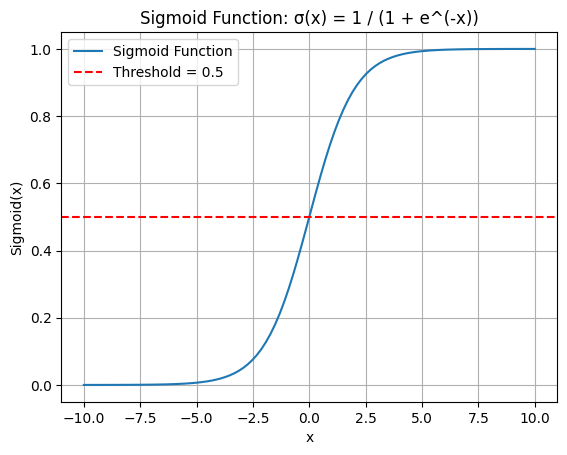

In [ ]:
x_vals = np.linspace(-10, 10, 100)
sigmoid_vals = expit(x_vals)

plt.plot(x_vals, sigmoid_vals, label='Sigmoid Function')
plt.title("Sigmoid Function: σ(x) = 1 / (1 + e^(-x))")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.show()